In [ ]:
#Market Basket Analysis is a powerful data science tool that is used by retailers and businesses to uncover associations 
#and relationships between items purchased together by customers to directly benefit businesses.

#Ever observed how some items are in close proximity in the grocery store, for example items like pasta and pasta sauce 
#or bread and jam. 
#This method reveals hidden correlations, using statistical rules to detect frequently occurring product combinations
#in transactions, uncovering associations that might not be seen by the human eye.


#The goal of this project is to perform market basket ana;ysis to uncover patterns in customer purchasing behavior. By 
#identifying which products tend to be bought together, the company can make informed decision s to improve sales 
#and customers satisfaction.



In [45]:
#importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Reading the dataset
df=pd.read_csv("Groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [11]:
#Preparing my data
#Checking for null values

df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [12]:
#Changing date to datetimeformat
df['date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\BerryLively\AppData\Local\Temp\ipykernel_9536\3983532214.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df["Date"])


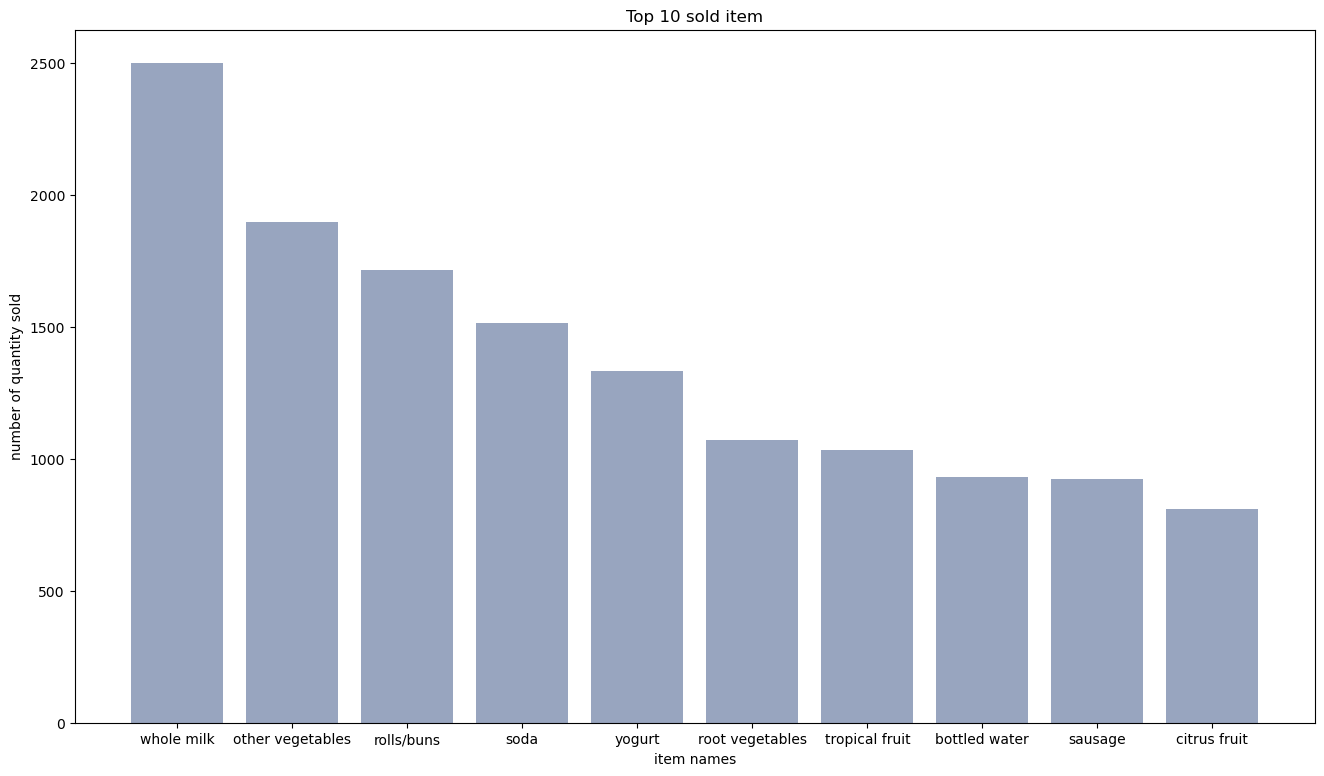

In [13]:
#data aggregation to find the top 10 most frequently sold items
#visualize the information using a bar chart to show the quantity sold for each item.


item_distr = df.groupby(by= 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = item_distr["itemDescription"]
height = item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold item")
plt.xlabel("item names")
plt.ylabel('number of quantity sold')

plt.xticks(x_pos, bars)

plt.show()




In [14]:
#setting the 'Date' column as the index and stores the modified DataFrame in a new variable named df_date
#to simplify tasks like plotting trends overtime.
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


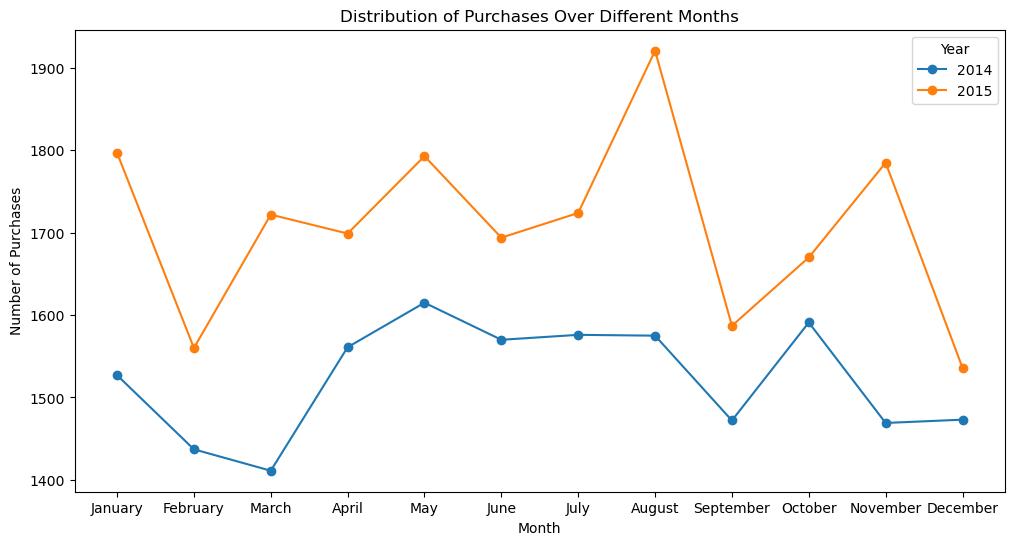

In [19]:
#This result plot shows how the number of purchases varies month by month over the years.

# Define months order list
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Assuming df is your DataFrame containing the 'Date' column

# Convert 'Date' column to 'Month' and 'Year'
df['Month'] = pd.Categorical(df['Date'].dt.strftime('%B'), categories=months_order, ordered=True)
df['Year'] = df['Date'].dt.year

# Group by Year and Month and count the number of purchases
purchase_distribution = df.groupby(['Year', 'Month']).size().reset_index(name='Number_of_purchases')

# Plotting
plt.figure(figsize=(12, 6))

for year in purchase_distribution['Year'].unique():
    year_data = purchase_distribution[purchase_distribution['Year'] == year]
    plt.plot(year_data['Month'], year_data['Number_of_purchases'], label=str(year), marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Purchases Over Different Months')
plt.legend(title='Year', loc='upper right')
plt.show()



In [20]:
#The Apriori algorithm is the most common technique for performing market basket analysis.It is used for association 

#rule mining, which is a rule-based process used to identify correlations between items purchased by users.




pip install apyori

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [22]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
#This analysis shows the frequency at which each item was purchased

import pandas as pd

# Assuming 'df' is your DataFrame with transactional data

# Group by 'itemDescription' and calculate frequencies
item_distribution = df.groupby('itemDescription').size().reset_index(name='frequency')

# Get the top 10 items by frequency
top_10_items = item_distribution.nlargest(10, 'frequency')

# Display the top 10 items and their frequencies
print(top_10_items)


      itemDescription  frequency
164        whole milk       2502
102  other vegetables       1898
122        rolls/buns       1716
138              soda       1514
165            yogurt       1334
123   root vegetables       1071
156    tropical fruit       1032
12      bottled water        933
130           sausage        924
30       citrus fruit        812


In [ ]:
item_Distribution.head(10)

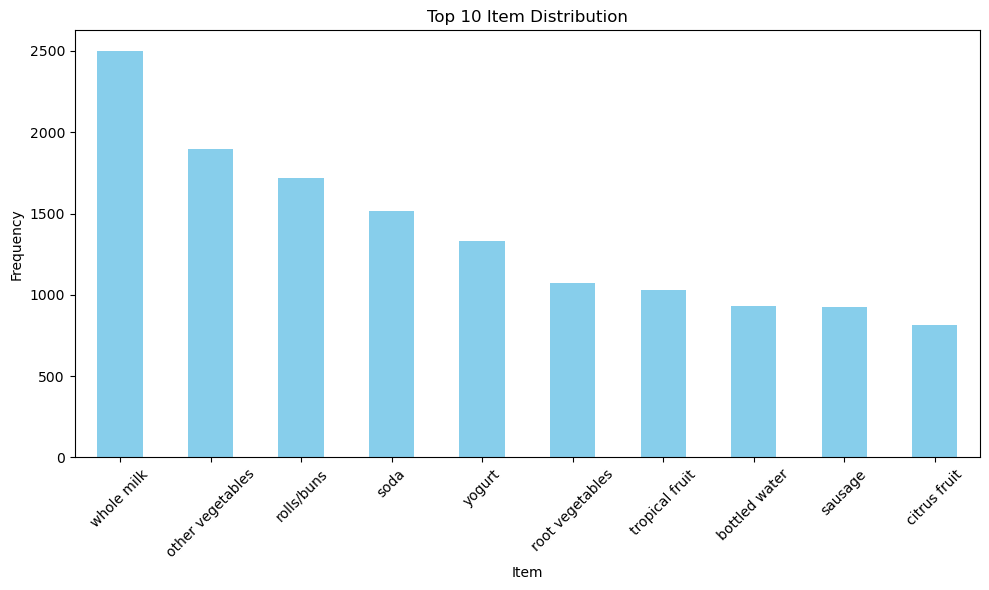

In [25]:
#Top 10 itemdistribution by frequency

top_items = df['itemDescription'].value_counts().head(10)
# Plot the distribution of top 10 items
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Item Distribution')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# ordering Member_number column from highest to the lowest Member_number.

cust_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level
                                                            

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [38]:
#This code Market Basket Analysis using the Apriori algorithm by preparing transactions
#from the data and extracting association rules based on specified support, confidence, lift, and length thresholds.

#How Apriori algorithm works: Many customers commonly buy baby formula, diapers and  baby wipes together, establishing
#{formular, diapers and baby wipes} as a prevalent itemset in a majority of purchases. Consequently, if one purchases 
#baby formula, they will be recommended baby wipes and formula.

#As per the Apriori algorithm, subsets of a frequent itemset are also deemed frequent. Thus, since {baby formula, wipes and
#diapers} is frequent, it implies that {baby formula, diaper}, {baby formula, baby wipes}, and {diaper, baby wipes} are also
#frequent. This signifies that if a customer opts for baby formula, they will likely be suggested both baby wipes and diaper
#as well.

transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002,min_confidence = 0.05, min_lift =3 , min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [43]:
#To extract information from association rule results and then create a DataFrame to display this information, 
#focusing on the top 10 rules with the highest lift values.

def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs =  [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidence = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidence,lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

resultsindataframe.nlargest(n=10, columns= "Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,berries,pork,0.002052,0.105263,14.654135
4914,berries,pork,0.002052,0.105263,12.068111
2674,oil,pork,0.002052,0.242424,11.524021
3573,citrus fruit,specialty chocolate,0.002052,0.073394,11.443670
4133,long life bakery product,meat,0.002052,0.148148,11.105413
3290,oil,sausage,0.002052,0.150943,10.322410
2904,bottled beer,other vegetables,0.002309,0.097826,9.533152
5045,meat,other vegetables,0.002052,0.135593,9.438257
2902,bottled beer,root vegetables,0.002052,0.086957,9.415459
2734,berries,soda,0.002309,0.118421,9.232105


In [ ]:
#This result table above shows that the products that are tend to be bought together are:

#Berries and Pork
#Oil and Pork
#Citrus fruit and Specialty chocolate
#Long life bakery product and Meat
#Oil and Sausage
#Bottled beer and Other vegetables
#Meat and Other vegetables
#Bottled beer and Root vegetables
#Berries and Soda
